In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

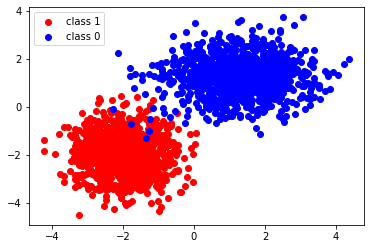

In [2]:
# Generate data
def load_data():
	# generate random 2-D data
	X_pos = np.random.randn(1000, 2) * np.array([[0.7, 0.8]]) + np.array([[-2.0, -2.0]])
	X_neg = np.random.randn(1000, 2) * np.array([[1.0, 0.8]]) + np.array([[1.25, 1.25]])
	X = np.concatenate([X_pos, X_neg], axis=0)
	y = np.concatenate([np.ones(1000), -np.ones(1000)])
	return X, y

# here is the visualization of data
X, y = load_data()
plt.figure()
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], c='red', label='class 1')
plt.scatter(X[y==-1][:, 0], X[y==-1][:, 1], c='blue', label='class 0')
plt.legend()
plt.savefig('toy.png')

# TO DO:
# Randomly split the data in to training set and testing test; 
# Let testing set contain 20% of total dataset
# You can check the train_test_split function in sklearn package

# TO DO:
# Implement linear SVM from scratch;
# Plot the curve of training accuracy and testing accuracy

In [3]:
X, y = load_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)


(array([[-1.74873067, -2.16106684],
        [-2.60142542, -3.05922741],
        [-2.17045185, -2.20452221],
        ...,
        [-2.73287549, -1.59059526],
        [ 2.99652427,  0.94207097],
        [ 0.52284726,  0.53802866]]),
 array([ 1.,  1.,  1., ...,  1., -1., -1.]))

0.99
[-0.75442978 -0.89067053] 0.7640000000000006


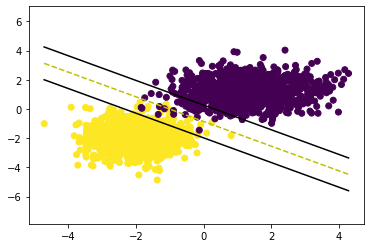

In [16]:
class SVM():
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        y_ = np.where(y <= 0, -1, 1)

        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (
                        2 * self.lambda_param * self.w - np.dot(x_i, y_[idx])
                    )
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)


# Testing
if __name__ == "__main__":
    # Imports
    from sklearn import datasets
    import matplotlib.pyplot as plt

#     X, y = datasets.make_blobs(
#         n_samples=50, n_features=2, centers=2, cluster_std=1.05, random_state=40
#     )
#     y = np.where(y == 0, -1, 1)
    X,y = load_data()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

    clf = SVM()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = np.sum(y_test == y_pred) / len(y_test)
    print(accuracy)

    print(clf.w, clf.b)

    def visualize_svm():
        def get_hyperplane_value(x, w, b, offset):
            return (-w[0] * x + b + offset) / w[1]

        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
        plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)

        x0_1 = np.amin(X[:, 0])
        x0_2 = np.amax(X[:, 0])

        x1_1 = get_hyperplane_value(x0_1, clf.w, clf.b, 0)
        x1_2 = get_hyperplane_value(x0_2, clf.w, clf.b, 0)

        x1_1_m = get_hyperplane_value(x0_1, clf.w, clf.b, -1)
        x1_2_m = get_hyperplane_value(x0_2, clf.w, clf.b, -1)

        x1_1_p = get_hyperplane_value(x0_1, clf.w, clf.b, 1)
        x1_2_p = get_hyperplane_value(x0_2, clf.w, clf.b, 1)

        ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
        ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
        ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

        x1_min = np.amin(X[:, 1])
        x1_max = np.amax(X[:, 1])
        ax.set_ylim([x1_min - 3, x1_max + 3])

        plt.show()
        fig.savefig('svmtoy.png')

    visualize_svm()

In [23]:
vec_iters = [1,5, 10, 20, 30, 50, 100,1000]
# num_iters = 100000
acc_vec = []
for i in vec_iters: 
    clf = SVM(n_iters = i)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = np.sum(y_test == y_pred) / len(y_test)
    acc_vec.append(accuracy)
    



In [24]:
vec_iters

[1, 5, 10, 20, 30, 50, 100, 1000]

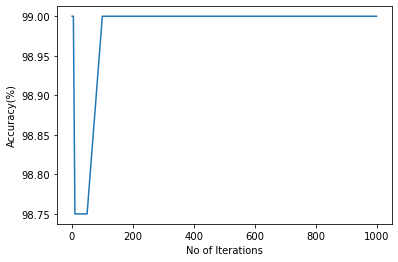

In [25]:
plt.figure()
plt.plot(vec_iters, np.array(acc_vec)*100)
plt.xlabel('No of Iterations')
plt.ylabel('Accuracy(%)')
plt.savefig('accuracy.png')